In [84]:
####################################################################################################
####################################################################################################
####################################### import libraries ###########################################
####################################################################################################
####################################################################################################

import polars as pl 
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader

import matplotlib.pyplot as plt
%matplotlib inline

import collections
import random

# import os
# import re
# import time
# import numpy as np
# import pandas as pd
# import polars as pl
# import nltk
# from nltk.corpus import stopwords
# from nltk.stem import WordNetLemmatizer, PorterStemmer
# from sklearn.dummy import DummyClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# from sklearn.neural_network import MLPClassifier
# from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score
# from sklearn.model_selection import train_test_split
# from xgboost import XGBClassifier
# import matplotlib.pyplot as plt
# from tqdm import tqdm
# from autocorrect import Speller
# import emot 
# import emoji
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from torch.utils.data import DataLoader, Dataset
# from scipy.stats import mode

# # Download necessary NLTK data
# nltk.download('stopwords')
# nltk.download('wordnet')

# # Load pre-trained word embeddings (e.g., Word2Vec)
# import gensim.downloader as api
# embeddings_model = api.load("word2vec-google-news-300")

In [85]:

####################################################################################################
####################################################################################################
####################################### global variables ###########################################
####################################################################################################
####################################################################################################

# spell=Speller(lang="en", fast=True)
list_of_countries_trigrams = ['AFG', 'RSA', 'ALB', 'ALG', 'GER', 'AND', 'ENG', 'ANG', 'AIA', 'ATG', 'KSA', 'ARG', 'ARM', 'ARU', 'AUS', 'AUT', 'AZE', 'BAH', 'BHR', 'BAN', 'BRB', 'BEL', 'BLZ', 'BEN', 'BER', 'BHU', 'BLR', 'MYA', 'BOL', 'BIH', 'BOT', 'BRA', 'BRU', 'BUL', 'BFA', 'BDI', 'CAM', 'CMR', 'CAN', 'CPV', 'CHI', 'CHN', 'CYP', 'COL', 'COM', 'CGO', 'PRK', 'KOR', 'CRC', 'CIV', 'CRO', 'CUB', 'CUR', 'DEN', 'DJI', 'DMA', 'SCO', 'EGY', 'UAE', 'ECU', 'ERI', 'ESP', 'EST', 'ESW', 'USA', 'ETH', 'FIJ', 'FIN', 'FRA', 'GAB', 'GAM', 'GEO', 'GHA', 'GIB', 'GRE', 'GRN', 'GUA', 'GUM', 'GUI', 'EQG', 'GNB', 'GUY', 'HAI', 'HON', 'HKG', 'HUN', 'CAY', 'COK', 'FRO', 'SOL', 'TCA', 'VGB', 'VIR', 'IND', 'IDN', 'IRQ', 'IRN', 'IRL', 'NIR', 'ISL', 'ISR', 'ITA', 'JAM', 'JPN', 'JOR', 'KAZ', 'KEN', 'KGZ', 'KVX', 'KUW', 'LAO', 'LES', 'LVA', 'LBN', 'LBR', 'LBY', 'LIE', 'LTU', 'LUX', 'MAC', 'MKD', 'MAD', 'MAS', 'MWI', 'MDV', 'MLI', 'MLT', 'MAR', 'MRI', 'MTN', 'MEX', 'MDA', 'MNG', 'MNE', 'MSR', 'MOZ', 'NAM', 'NEP', 'NCA', 'NIG', 'NGA', 'NOR', 'NCL', 'NZL', 'OMA', 'UGA', 'UZB', 'PAK', 'PLE', 'PAN', 'PNG', 'PAR', 'NED', 'WAL', 'PER', 'PHI', 'POL', 'PUR', 'POR', 'QAT', 'COD', 'CTA', 'DOM', 'CZE', 'ROU', 'RUS', 'RWA', 'SKN', 'SMR', 'VIN', 'LCA', 'SLV', 'SAM', 'ASA', 'STP', 'SEN', 'SRB', 'SEY', 'SLE', 'SIN', 'SVK', 'SVN', 'SOM', 'SDN', 'SSD', 'SRI', 'SWE', 'SUI', 'SUR', 'SYR', 'TJK', 'TAH', 'TPE', 'TAN', 'CHA', 'THA', 'TLS', 'TOG', 'TGA', 'TRI', 'TUN', 'TKM', 'TUR', 'UKR', 'URU', 'VAN', 'VEN', 'VIE', 'YEM', 'ZAM', 'ZIM', 'BOE', 'GUF', 'GBR', 'GLP', 'NMI', 'KIR', 'MTQ', 'NIU', 'REU', 'SMN', 'SMA', 'TUV', 'ZAN', 'ALA', 'COR', 'GRL', 'GUE', 'IMA', 'FLK', 'MHL', 'JER', 'MYT', 'FSM', 'MCO', 'PLW', 'EUS', 'ESH', 'BLM', 'SPM', 'SHN', 'VAT', 'WLF']

path_to_data = "../../challenge_data/"
path_to_training_tweets = path_to_data + "train_tweets"
path_to_eval_tweets = path_to_data + "eval_tweets"

# # Initialize Python porter stemmer
# ps = PorterStemmer()

# # Initialize Python wordnet lemmatizer
# wnl = WordNetLemmatizer()

# # Initialize emot 
# emot_obj = emot.core.emot() 

In [86]:
def load_data(path, verbose=False):
    li = []
    for filename in os.listdir(path):
        df = pl.read_csv(path + "/" + filename)
        li.append(df)
    output = pl.concat(li)
    if verbose:
        print(output.head())
        print(f'The shape of the data is: {output.shape}')
    return output

In [87]:
df_train = load_data(path_to_training_tweets)
df_train = df_train.head(1000000)
print(df_train)

shape: (1_000_000, 6)
┌──────┬─────────┬──────────┬───────────┬───────────────┬─────────────────────────────────┐
│ ID   ┆ MatchID ┆ PeriodID ┆ EventType ┆ Timestamp     ┆ Tweet                           │
│ ---  ┆ ---     ┆ ---      ┆ ---       ┆ ---           ┆ ---                             │
│ str  ┆ i64     ┆ i64      ┆ i64       ┆ i64           ┆ str                             │
╞══════╪═════════╪══════════╪═══════════╪═══════════════╪═════════════════════════════════╡
│ 2_0  ┆ 2       ┆ 0        ┆ 0         ┆ 1403538600000 ┆ RT @soccerdotcom: If #ESP beat… │
│ 2_0  ┆ 2       ┆ 0        ┆ 0         ┆ 1403538600000 ┆ Visit the #SITEP official web … │
│ 2_0  ┆ 2       ┆ 0        ┆ 0         ┆ 1403538600000 ┆ RT @soccerdotcom: If #ESP beat… │
│ 2_0  ┆ 2       ┆ 0        ┆ 0         ┆ 1403538600000 ┆ RT @worldsoccershop: If there … │
│ 2_0  ┆ 2       ┆ 0        ┆ 0         ┆ 1403538600000 ┆ RT @soccerdotcom: If #AUS beat… │
│ …    ┆ …       ┆ …        ┆ …         ┆ …             ┆ 

In [88]:
df_train_bis = (
    df_train
    .group_by(["ID", "MatchID", "PeriodID"])
    .agg([
        pl.col("Tweet").str.concat(" ").alias("Concatenated_Tweets"),
        pl.col("EventType").first().alias("EventType"),  # Retain EventType
        pl.col("Timestamp").first().alias("Timestamp"),  # Retain Timestamp
    ])
    .sort(["ID", "MatchID", "PeriodID"])  # Optional: To maintain order
)

print(df_train_bis)


shape: (459, 6)
┌──────┬─────────┬──────────┬─────────────────────────────────┬───────────┬───────────────┐
│ ID   ┆ MatchID ┆ PeriodID ┆ Concatenated_Tweets             ┆ EventType ┆ Timestamp     │
│ ---  ┆ ---     ┆ ---      ┆ ---                             ┆ ---       ┆ ---           │
│ str  ┆ i64     ┆ i64      ┆ str                             ┆ i64       ┆ i64           │
╞══════╪═════════╪══════════╪═════════════════════════════════╪═══════════╪═══════════════╡
│ 1_0  ┆ 1       ┆ 0        ┆ RT @RMadridHome: Sami Khedira … ┆ 0         ┆ 1404849000000 │
│ 1_1  ┆ 1       ┆ 1        ┆ RT @_princessmeel: It's going … ┆ 0         ┆ 1404849061000 │
│ 1_10 ┆ 1       ┆ 10       ┆ TEAM GERMANY BITCH BYE Germany… ┆ 1         ┆ 1404849601000 │
│ 1_11 ┆ 1       ┆ 11       ┆ kick off brazil vs german       ┆ 1         ┆ 1404849661000 │
│      ┆         ┆          ┆ #gog…                           ┆           ┆               │
│ 1_12 ┆ 1       ┆ 12       ┆ let's go germany :) Its time t… ┆ 

In [89]:
train, test = train_test_split(df_train_bis, test_size=0.3, random_state=1337)

In [90]:
print(f'The shape of the training data is: {train.shape}')
print(f'The shape of the testing data is: {test.shape}')

The shape of the training data is: (321, 6)
The shape of the testing data is: (138, 6)


In [91]:
import torchtext
from torchtext.data import get_tokenizer
from collections import Counter

tokenizer = get_tokenizer("basic_english")

# Build vocabulary
words=[]
num_words = 1000
for text in train['Concatenated_Tweets']:
    tokens=tokenizer(text)
    words.extend(tokens)

print(f'The number of words in the training data is: {len(words)}')
print(f'Sample of words: {words[:10]}')

The number of words in the training data is: 11804635
Sample of words: ['rt', '@brazil14wc', 'neymar', 'is', 'now', 'joint', '6th', 'all-time', 'brazil', 'top']


In [92]:
number_of_words_in_dict = 1000

top_words = dict(Counter(words).most_common(number_of_words_in_dict))

print(f'The top {number_of_words_in_dict} words are: {top_words}')

The top 1000 words are: {'.': 758323, 'rt': 417458, '!': 300965, 'the': 255249, "'": 220411, 'brazil': 198820, '//t': 185141, 'http': 183861, 'to': 181133, ',': 155705, 'germany': 140233, 'a': 139538, '#bra': 133163, 'ghana': 124693, 'in': 118092, 'and': 111963, 'for': 108116, 'is': 104740, 's': 100456, 'i': 89663, 'of': 88091, '#worldcup': 76629, 'goal': 73111, 'this': 71522, 'if': 71522, '#esp': 62940, 'it': 61134, 'vs': 60147, '#ger': 59594, 'on': 59162, '?': 57299, '#gha': 56467, 'we': 55345, '#cmr': 53388, 'world': 46333, '#aus': 43621, 'you': 43088, 'game': 42757, 'cup': 42534, 'that': 41300, 't': 41077, 'with': 40839, 'win': 40771, 'portugal': 40260, '#por': 40078, 'be': 39029, 'now': 38245, 'neymar': 37375, 'are': 36576, 'will': 36438, 'so': 36074, 'go': 35301, 'follow': 34858, 'they': 33807, 'scores': 32334, 'just': 32272, 'enter': 31060, 'at': 30717, 'll': 29622, 'but': 29378, 'have': 29346, 'goals': 29285, 'like': 28911, 'give': 28798, 'one': 27993, '#usa': 27184, ')': 26724

In [93]:
# Add <unk> token to the dictionary
top_words['<unk>'] = number_of_words_in_dict + 1 # default index used when an unknown word is found
# Add <pad> token to the dictionary
top_words['<pad>'] = number_of_words_in_dict + 2 # default index used when padding a sentence (i.e., make it the same length)

vocab = torchtext.vocab.vocab(top_words, specials=['<unk>', '<pad>']) 
vocab.set_default_index(vocab['<unk>']) #default index used when an unknown words is found

print(f'Example of how a sentence is transformed into a sequence of numerical IDs: \n "{train["Concatenated_Tweets"][0][:50]}..." \n becomes \n {vocab.forward(tokenizer(train["Concatenated_Tweets"][0]))}') 

Example of how a sentence is transformed into a sequence of numerical IDs: 
 "RT @Brazil14WC: Neymar is now joint 6th all-time B..." 
 becomes 
 [3, 779, 49, 19, 48, 0, 780, 418, 7, 201, 278, 0, 951, 43, 786, 63, 2, 98, 6, 20, 57, 614, 2, 14, 9, 8, 2, 0, 3, 486, 24, 4, 345, 117, 110, 70, 14, 83, 49, 68, 9, 8, 2, 869, 23, 3, 841, 0, 71, 49, 100, 57, 107, 5, 325, 24, 22, 5, 97, 77, 2, 0, 2, 14, 3, 854, 24, 7, 4, 49, 307, 5, 469, 5, 145, 71, 5, 325, 24, 22, 5, 97, 36, 40, 16, 7, 6, 20, 325, 36, 40, 96, 4, 14, 81, 452, 3, 262, 49, 56, 5, 325, 24, 22, 25, 36, 40, 16, 7, 6, 20, 325, 36, 40, 96, 43, 13, 963, 0, 0, 2, 81, 0, 3, 705, 49, 19, 48, 0, 780, 418, 7, 201, 278, 0, 951, 43, 786, 63, 2, 98, 6, 20, 57, 614, 2, 14, 9, 8, 2, 0, 3, 745, 98, 6, 20, 184, 14, 35, 9, 8, 2, 0, 838, 35, 179, 50, 148, 0, 17, 0, 3, 77, 24, 35, 178, 14, 170, 562, 5, 219, 43, 13, 826, 692, 87, 23, 190, 110, 9, 8, 2, 866, 3, 347, 26, 296, 56, 109, 35, 34, 51, 65, 69, 126, 446, 768, 22, 293, 3, 17, 54, 10, 58, 2, 9, 8,

In [ ]:
import typing as t

max_len = 80

def vectorize_sentences(tweets: t.Iterable[str], max_len: int) -> np.ndarray:
    """Converts an iterable of strings into an array encoded from the vocabulary.
    
    Parameters
    ----------
    reviews :
        An iterable containing the sentences (as string) of the datasets
    max_len :
        Sentences are clipped / padded to this maximu number of words
        
    Returns
    -------
    vectorized :
        An array of shape (num_reviews, max_len) containing the dataset.
        Each sentence is encoded to a sequence of integers based on the vocabulary.
    """
    vectors=[]
    for text in tweets:
        tokens=tokenizer(text)
        v=vocab.forward(tokens)
        if len(v) > max_len : v = v[:max_len]
        if len(v) < max_len : #padding
            tmp = np.full(max_len, vocab['<pad>'])
            tmp[0:len(v)]=v 
            v = tmp
        vectors.append(np.array(v))
    return np.array(vectors)


train_X = vectorize_sentences(train['Concatenated_Tweets'], max_len)
test_X = vectorize_sentences(test['Concatenated_Tweets'], max_len)

train_y = np.array(train['EventType']).reshape(-1,1)
test_y = np.array(test['EventType']).reshape(-1,1)


In [ ]:
from torch.utils.data import TensorDataset, DataLoader

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# device = torch.device("cpu")

# Define batch size 
batch_size = 64

print(f"train_X shape: {train_X.shape}, dtype: {train_X.dtype}")
print(f"train_y shape: {train_y.shape}, dtype: {train_y.dtype}")
print(f"test_X shape: {test_X.shape}, dtype: {test_X.dtype}")
print(f"test_y shape: {test_y.shape}, dtype: {test_y.dtype}")
print(f"Unique train_y values: {np.unique(train_y)}")
print(f"Unique test_y values: {np.unique(test_y)}")

train_X_tensor = torch.from_numpy(train_X).to(device)
train_y_tensor = torch.from_numpy(train_y).to(device)

print(f"train_X_tensor device: {train_X_tensor.device}")
print(f"train_y_tensor device: {train_y_tensor.device}")


# Create tensor datasets
trainset = TensorDataset(torch.from_numpy(train_X).to(device), torch.from_numpy(train_y).float().to(device))
testset = TensorDataset(torch.from_numpy(test_X).to(device), torch.from_numpy(test_y).float().to(device))

print(f"trainset: {len(trainset)}")
print(f"testset: {len(testset)}")

# Create dataloaders
train_loader = DataLoader(trainset, shuffle=True, batch_size=batch_size)
test_loader = DataLoader(testset, shuffle=True, batch_size=batch_size)

train_X shape: (321, 80), dtype: int64
train_y shape: (321, 1), dtype: int64
test_X shape: (138, 80), dtype: int64
test_y shape: (138, 1), dtype: int64
Unique train_y values: [0 1]
Unique test_y values: [0 1]
train_X_tensor device: cuda:0
train_y_tensor device: cuda:0
trainset: 321
testset: 138


In [96]:
class FeedforwardNeuralNetModel(nn.Module):
    def __init__(self, input_dim, embedding_dim, hidden_dim, output_dim, max_len):
        super().__init__()
        self.embedding_dim = embedding_dim
        # Embedding layer
        self.embedding = nn.Embedding(input_dim, embedding_dim)
        
        # Linear function
        self.fc1 = nn.Linear(max_len*embedding_dim, hidden_dim) 
        
        # Linear function (readout)
        self.fc2 = nn.Linear(hidden_dim, output_dim)
        
    def forward(self, x):
        # Embedding
        embedded = self.embedding(x)
        #print("embedding for word ", vocab.lookup_token(42))
        #print(self.embedding(torch.Tensor([42]).int()))
        embedded = embedded.view(-1, max_len*self.embedding_dim)
        # Linear function
        out = self.fc1(embedded)

        # Non-linearity
        out = torch.relu(out)

        # Take note here use a final sigmoid function so your loss should not go through sigmoid again as we are using BCE loss.
        out = self.fc2(out)
        out = torch.sigmoid(out)
    
        return out

In [97]:
input_dim = num_words + 2 #add 2 for start and end sentence symbols
embedding_dim = 100
hidden_dim = 32
output_dim = 1

# Instantiate model class and assign to object
model = FeedforwardNeuralNetModel(input_dim, embedding_dim, hidden_dim, output_dim, max_len)

# Push model to CUDA device if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

# Loss function (binary cross-entropy)
criterion = nn.BCELoss()

# Optimizer
optimizer = torch.optim.RMSprop(model.parameters(), lr=1e-3)

In [98]:
def check_model_parameter_sizes(mode: torch.nn.Module):
    
    # Number of groups of parameters
    print('Number of groups of parameters {}'.format(len(list(model.parameters()))))
    print('-'*55)
    # Print parameters

    total = 0
    for name, param in model.named_parameters():
        print(f"{name:17} : [{param.numel():6}] {param.size()}")
        total += param.numel()

    print(f"{'TOTAL':17} : [{total:6}]")

    print('-'*55)

check_model_parameter_sizes(model)

Number of groups of parameters 5
-------------------------------------------------------
embedding.weight  : [100200] torch.Size([1002, 100])
fc1.weight        : [256000] torch.Size([32, 8000])
fc1.bias          : [    32] torch.Size([32])
fc2.weight        : [    32] torch.Size([1, 32])
fc2.bias          : [     1] torch.Size([1])
TOTAL             : [356265]
-------------------------------------------------------


In [99]:
def train_model(model, optimizer, loss_criterion):
    iter = 0
    num_epochs = 10
    history_train_acc, history_val_acc, history_train_loss, history_val_loss = [], [], [], []
    best_accuracy = 0
    for epoch in range(num_epochs):
        for i, (samples, labels) in enumerate(train_loader):
            # Training mode
            model.train()

            # Load samples
            samples = samples.view(-1, max_len).to(device)
            labels = labels.view(-1, 1).to(device)
            
            # print(f"samples device: {samples.device}, labels device: {labels.device}")


            # Clear gradients w.r.t. parameters
            optimizer.zero_grad()

            # Forward pass to get output/logits
            outputs = model(samples)
            assert torch.all(outputs >= 0) and torch.all(outputs <= 1), "Model outputs not in [0, 1] range!"

            # Calculate Loss: softmax --> cross entropy loss
            loss = loss_criterion(outputs, labels)

            # Getting gradients w.r.t. parameters
            loss.backward()

            # Updating parameters
            optimizer.step()

            iter += 1

            if iter % 100 == 0:
                # Get training statistics
                train_loss = loss.data.item()

                # Testing mode
                model.eval()
                # Calculate Accuracy         
                correct = 0
                total = 0
                # Iterate through test dataset
                for samples, labels in test_loader:
                    # Load samples
                    samples = samples.view(-1, max_len).to(device)
                    labels = labels.view(-1).to(device)

                    # Forward pass only to get logits/output
                    outputs = model(samples)

                    # Val loss
                    val_loss = criterion(outputs.view(-1, 1), labels.view(-1, 1))

                    predicted = outputs.ge(0.5).view(-1)

                    # Total number of labels
                    total += labels.size(0)

                    # Total correct predictions
                    correct += (predicted.type(torch.FloatTensor).cpu() == labels.type(torch.FloatTensor)).sum().item()
                    # correct = (predicted == labels.byte()).int().sum().item()

                accuracy = 100. * correct / total

                # Print Loss
                print(f'Iter: {iter:4} | Train Loss: {train_loss:.3f} | Val Loss: {val_loss.item():2.3f} | Val Accuracy: {accuracy:.2f}')

                # Append to history
                history_val_loss.append(val_loss.data.item())
                history_val_acc.append(round(accuracy, 2))
                history_train_loss.append(train_loss)

                # Save model when accuracy beats best accuracy
                if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    # We can load this best model on the validation set later
                    torch.save(model.state_dict(), 'best_model.pth')
    return (history_train_acc, history_val_acc, history_train_loss, history_val_loss)



In [100]:
def plot_losses(history_train_loss, history_val_loss):
    # Set plotting style
    #plt.style.use(('dark_background', 'bmh'))
    plt.style.use('bmh')
    plt.rc('axes', facecolor='none')
    plt.rc('figure', figsize=(16, 4))

    # Plotting loss graph
    plt.plot(history_train_loss, label='Train')
    plt.plot(history_val_loss, label='Validation')
    plt.title('Loss Graph')
    plt.legend()
    plt.show()

In [101]:
(train_acc, val_acc, train_loss, val_loss) = train_model(model, optimizer, criterion)


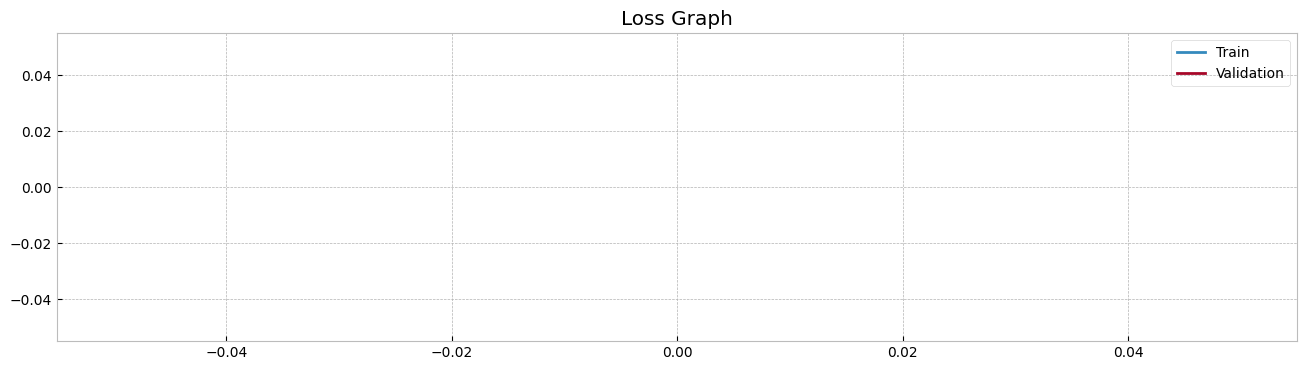

In [102]:
plot_losses(train_loss, val_loss)

Epoch 1/10, Train Loss: 0.6025, Val Loss: 0.5759, Val Accuracy: 0.7227
Epoch 2/10, Train Loss: 0.4700, Val Loss: 0.5248, Val Accuracy: 0.7477
Epoch 3/10, Train Loss: 0.4162, Val Loss: 0.5014, Val Accuracy: 0.7461
Epoch 4/10, Train Loss: 0.3679, Val Loss: 0.5010, Val Accuracy: 0.7617
Epoch 5/10, Train Loss: 0.3291, Val Loss: 0.4934, Val Accuracy: 0.7695
Epoch 6/10, Train Loss: 0.2978, Val Loss: 0.5099, Val Accuracy: 0.7679
Epoch 7/10, Train Loss: 0.2648, Val Loss: 0.5211, Val Accuracy: 0.7757
Epoch 8/10, Train Loss: 0.2457, Val Loss: 0.5393, Val Accuracy: 0.7726
Epoch 9/10, Train Loss: 0.2186, Val Loss: 0.5670, Val Accuracy: 0.7586
Epoch 10/10, Train Loss: 0.2052, Val Loss: 0.5678, Val Accuracy: 0.7617


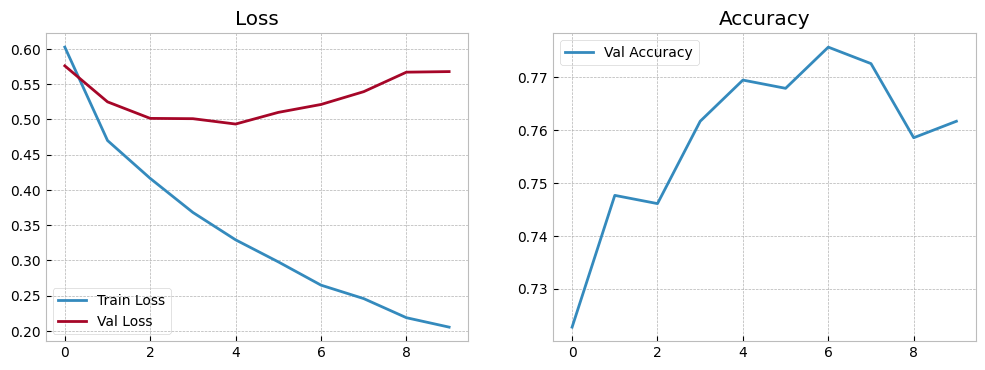

In [127]:
# %%
import polars as pl 
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from collections import Counter

# %%
# Load data
def load_data(path, verbose=False):
    li = []
    for filename in os.listdir(path):
        df = pl.read_csv(os.path.join(path, filename))
        li.append(df)
    output = pl.concat(li)
    if verbose:
        print(output.head())
        print(f'The shape of the data is: {output.shape}')
    return output

# Define paths
path_to_data = "../../challenge_data/"
path_to_training_tweets = os.path.join(path_to_data, "train_tweets")
path_to_eval_tweets = os.path.join(path_to_data, "eval_tweets")

# Load training data
df_train = load_data(path_to_training_tweets)
# df_train = df_train.head(1000000)

# Group and concatenate tweets
df_train_bis = (
    df_train
    .group_by(["ID", "MatchID", "PeriodID"])
    .agg([
        pl.col("Tweet").str.concat(" ").alias("Concatenated_Tweets"),
        pl.col("EventType").first().alias("EventType")
    ])
    .sort(["ID", "MatchID", "PeriodID"])
)

# Train-test split
train, test = train_test_split(df_train_bis, test_size=0.3, random_state=1337)

# %%
# Tokenization and vocabulary creation
from torchtext.data import get_tokenizer

tokenizer = get_tokenizer("basic_english")

# Build vocabulary based on most frequent words in the training data
words = []
for text in train['Concatenated_Tweets']:
    words.extend(tokenizer(text))

number_of_words_in_dict = 1000
vocab = dict(Counter(words).most_common(number_of_words_in_dict))
keywords = list(vocab.keys())  # List of most frequent keywords

# %%
# Feature extraction: word frequency per review
def extract_keyword_frequencies(tweets, keywords):
    """
    Extract the frequency of each keyword in a list of tweets.

    Parameters
    ----------
    tweets : list
        List of tweets.
    keywords : list
        List of keywords.

    Returns
    -------
    np.array
        Feature matrix of shape (num_tweets, num_keywords).

    Examples
    --------
    >>> tweets = ['I love this movie!', 'I hate this movie.']
    >>> keywords = ['love', 'hate', 'movie']
    >>> extract_keyword_frequencies(tweets, keywords)
    array([[1, 0, 1],
           [0, 1, 1]])
    """

    feature_matrix = []
    for text in tweets:
        tokens = tokenizer(text)
        token_counts = Counter(tokens)
        frequencies = [token_counts[keyword] for keyword in keywords]
        feature_matrix.append(frequencies)
    return np.array(feature_matrix)/np.sum(np.array(feature_matrix), axis=1, keepdims=True)

train_X = extract_keyword_frequencies(train['Concatenated_Tweets'], keywords)
test_X = extract_keyword_frequencies(test['Concatenated_Tweets'], keywords)

# Standardize the feature matrix
scaler = StandardScaler() 
train_X = scaler.fit_transform(train_X) # train_X -> (train_X - mean(train_X)) / std(train_X)
test_X = scaler.transform(test_X)

# Labels
train_y = np.array(train['EventType']).reshape(-1, 1)
test_y = np.array(test['EventType']).reshape(-1, 1)

# %%
# Create TensorDatasets and DataLoaders
batch_size = 64

trainset = TensorDataset(torch.tensor(train_X, dtype=torch.float32), torch.tensor(train_y, dtype=torch.float32))
testset = TensorDataset(torch.tensor(test_X, dtype=torch.float32), torch.tensor(test_y, dtype=torch.float32))

train_loader = DataLoader(trainset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(testset, batch_size=batch_size, shuffle=False)

# %%
# Define a simple Feedforward Neural Network
class FeedforwardNeuralNetModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, output_dim)
        self.dropout = nn.Dropout(0.3)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.sigmoid(self.fc2(x))
        return x

# Hyperparameters
input_dim = train_X.shape[1]
hidden_dim = 64
output_dim = 1  # Binary classification

model = FeedforwardNeuralNetModel(input_dim, hidden_dim, output_dim)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

# Loss and optimizer
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)

# %%
# Training loop
def train_model(model, train_loader, test_loader, optimizer, criterion, num_epochs=10):
    history = {'train_loss': [], 'val_loss': [], 'val_accuracy': []}

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        # Validation
        model.eval()
        val_loss = 0.0
        correct = 0
        total = 0

        with torch.no_grad():
            for inputs, labels in test_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                val_loss += criterion(outputs, labels).item()
                predicted = (outputs > 0.5).float()
                correct += (predicted == labels).sum().item()
                total += labels.size(0)

        val_accuracy = correct / total
        history['train_loss'].append(train_loss / len(train_loader))
        history['val_loss'].append(val_loss / len(test_loader))
        history['val_accuracy'].append(val_accuracy)

        print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss/len(train_loader):.4f}, "
              f"Val Loss: {val_loss/len(test_loader):.4f}, Val Accuracy: {val_accuracy:.4f}")

    return history

# %%
# Train the model
history = train_model(model, train_loader, test_loader, optimizer, criterion)

# %%
# Plot training history
def plot_history(history):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history['train_loss'], label='Train Loss')
    plt.plot(history['val_loss'], label='Val Loss')
    plt.legend()
    plt.title('Loss')

    plt.subplot(1, 2, 2)
    plt.plot(history['val_accuracy'], label='Val Accuracy')
    plt.legend()
    plt.title('Accuracy')
    plt.show()

plot_history(history)


In [129]:
# %%
# Load and preprocess the evaluation dataset
df_eval = load_data(path_to_eval_tweets)

print(df_eval)

shape: (1_072_928, 5)
┌───────┬─────────┬──────────┬───────────────┬─────────────────────────────────┐
│ ID    ┆ MatchID ┆ PeriodID ┆ Timestamp     ┆ Tweet                           │
│ ---   ┆ ---     ┆ ---      ┆ ---           ┆ ---                             │
│ str   ┆ i64     ┆ i64      ┆ i64           ┆ str                             │
╞═══════╪═════════╪══════════╪═══════════════╪═════════════════════════════════╡
│ 6_0   ┆ 6       ┆ 0        ┆ 1403376600000 ┆ I Finally get to see Germany p… │
│ 6_0   ┆ 6       ┆ 0        ┆ 1403376600000 ┆ RT @Wor1dCup2014: If Any of th… │
│ 6_0   ┆ 6       ┆ 0        ┆ 1403376600000 ┆ Fascinated for this #GERvsGHA … │
│ 6_0   ┆ 6       ┆ 0        ┆ 1403376600000 ┆ : #GER and #GHA in a few.       │
│ 6_0   ┆ 6       ┆ 0        ┆ 1403376600000 ┆ BOATENG GRUDGE MATCH: 21/2 for… │
│ …     ┆ …       ┆ …        ┆ …             ┆ …                               │
│ 9_129 ┆ 9       ┆ 129      ┆ 1403647200000 ┆ RT @xja_mila: Ivory coast didn… │
│ 9_12

In [130]:
# Group and concatenate tweets in the evaluation dataset
df_eval_bis = (
    df_eval
    .group_by(["ID", "MatchID", "PeriodID"])
    .agg([
        pl.col("Tweet").str.concat(" ").alias("Concatenated_Tweets")
    ])
    .sort(["ID", "MatchID", "PeriodID"])
)

print(df_eval_bis)

shape: (516, 4)
┌────────┬─────────┬──────────┬─────────────────────────────────┐
│ ID     ┆ MatchID ┆ PeriodID ┆ Concatenated_Tweets             │
│ ---    ┆ ---     ┆ ---      ┆ ---                             │
│ str    ┆ i64     ┆ i64      ┆ str                             │
╞════════╪═════════╪══════════╪═════════════════════════════════╡
│ 15_0   ┆ 15      ┆ 0        ┆ I feel like shit >.< but gonna… │
│ 15_1   ┆ 15      ┆ 1        ┆ RT @NameLeSs_nV: #NED vs. #MEX… │
│ 15_10  ┆ 15      ┆ 10       ┆ RT @MerwinRodas: let's go Neth… │
│ 15_100 ┆ 15      ┆ 100      ┆ Get. Your. Dutch. Shit. Outta.… │
│ 15_101 ┆ 15      ┆ 101      ┆ RT @foodpornhoran: ALMOST MY W… │
│ …      ┆ …       ┆ …        ┆ …                               │
│ 9_95   ┆ 9       ┆ 95       ┆ Hoping the Ivory Coast beats G… │
│ 9_96   ┆ 9       ┆ 96       ┆ Please score once Ivory Coast … │
│ 9_97   ┆ 9       ┆ 97       ┆ Ivory Coast need to stop fucki… │
│ 9_98   ┆ 9       ┆ 98       ┆ @Sepoy20 picked the first tw

In [132]:
# Extract features for the evaluation dataset
eval_X = extract_keyword_frequencies(df_eval_bis['Concatenated_Tweets'], keywords)
# Standardize the features using the scaler fitted on the training data
eval_X = scaler.transform(eval_X)

print(eval_X)

[[-0.74190324 -0.15837071  0.94657581 ...  0.09923403 -0.18902066
   0.27259006]
 [-0.78929129 -0.03425031  0.76933054 ...  1.7616384  -0.18902066
   0.19659107]
 [-0.49503746  0.09406676  0.36778515 ...  0.2981758  -0.18902066
   0.44866379]
 ...
 [ 0.70609159 -1.54600981 -0.26122232 ... -0.79969737 -0.18902066
  -0.18138213]
 [ 1.38416366 -1.87216535 -0.03764015 ... -0.79969737 -0.18902066
  -0.18138213]
 [ 0.99664367 -1.84484867  0.18403903 ... -0.79969737 -0.18902066
  -0.18138213]]


In [137]:
# Create a DataLoader for the evaluation dataset
evalset = TensorDataset(torch.tensor(eval_X, dtype=torch.float32))
eval_loader = DataLoader(evalset, batch_size=batch_size, shuffle=False)

# %%
# Predict on the evaluation dataset
model.eval()  # Set the model to evaluation mode
predictions = []

with torch.no_grad():
    for inputs in eval_loader:
        inputs = inputs[0].to(device)  # Remove extra dimension from TensorDataset
        outputs = model(inputs)
        predicted = (outputs > 0.5).float().cpu().numpy()
        predictions.extend(predicted)

# Flatten predictions to match the required output format
predictions = np.array(predictions, dtype=int).flatten()

# %%
# Save predictions to a CSV file
df_eval_bis = df_eval_bis.with_columns(
    pl.Series("EventType", predictions)
)

output_path = "evaluation_predictions.csv"
df_eval_bis.select(["ID", "EventType"]).write_csv(output_path)
print(f"Predictions saved to {output_path}")


Predictions saved to evaluation_predictions.csv
